In [20]:
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# Yfinance will be used for importing historical oil prices
import yfinance as yfin
from sklearn.linear_model import LinearRegression

In [21]:
# Setting our ticker
ticker = 'AMZN'
ticker = yfin.Ticker(ticker)

# Importing our data
data = ticker.history(period='5y')

In [22]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-27 00:00:00-05:00,160.563004,160.809494,159.502502,159.766998,47858000,0.0,0.0
2020-11-30 00:00:00-05:00,160.423996,161.419495,156.277496,158.401993,81278000,0.0,0.0
2020-12-01 00:00:00-05:00,159.425003,162.447495,157.858994,161.003998,90740000,0.0,0.0
2020-12-02 00:00:00-05:00,161.082504,161.600006,158.662994,160.176498,62586000,0.0,0.0
2020-12-03 00:00:00-05:00,160.272995,161.432007,159.065506,159.336502,57840000,0.0,0.0
...,...,...,...,...,...,...,...
2025-11-19 00:00:00-05:00,223.740005,223.740005,218.520004,222.690002,58335600,0.0,0.0
2025-11-20 00:00:00-05:00,227.050003,227.410004,216.740005,217.139999,50309000,0.0,0.0
2025-11-21 00:00:00-05:00,216.350006,222.210007,215.179993,220.690002,68490500,0.0,0.0


<Axes: xlabel='Date', ylabel='Stock Price Change of Amazon'>

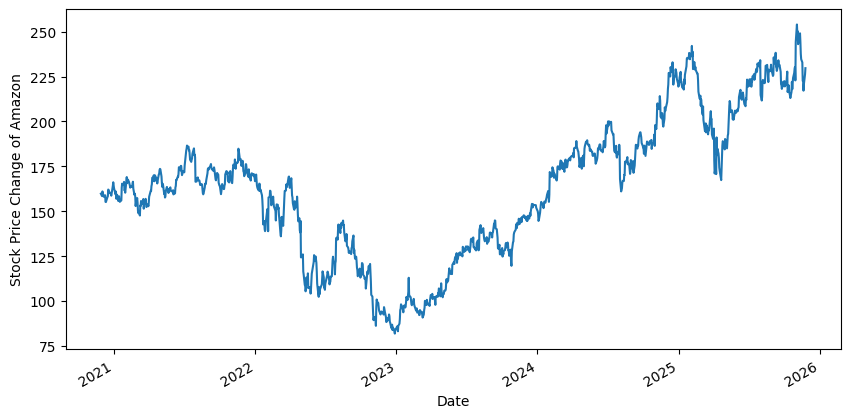

In [23]:
# Setting the text on the Y-axis
plt.ylabel("Stock Price Change of Amazon")

# Setting the size of our graph
data['Close'].plot(figsize=(10,5))

In [24]:
# SIMPLE MOVING AVERAGES
data['MA20'] = data['Close'].shift(1).rolling(window=20).mean()
data['MA50']= data['Close'].shift(1).rolling(window=50).mean()

# EMA
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()

#RSI
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA20,MA50,EMA20,RSI
Date,,,,,,,,,,,
2020-11-27 00:00:00-05:00,160.563004,160.809494,159.502502,159.766998,47858000,0.0,0.0,NaN,NaN,159.766998,NaN
2020-11-30 00:00:00-05:00,160.423996,161.419495,156.277496,158.401993,81278000,0.0,0.0,NaN,NaN,159.636998,NaN
2020-12-01 00:00:00-05:00,159.425003,162.447495,157.858994,161.003998,90740000,0.0,0.0,NaN,NaN,159.767188,NaN
2020-12-02 00:00:00-05:00,161.082504,161.600006,158.662994,160.176498,62586000,0.0,0.0,NaN,NaN,159.806170,NaN
2020-12-03 00:00:00-05:00,160.272995,161.432007,159.065506,159.336502,57840000,0.0,0.0,NaN,NaN,159.761440,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-19 00:00:00-05:00,223.740005,223.740005,218.520004,222.690002,58335600,0.0,0.0,236.360500,228.3256,234.090739,49.889050
2025-11-20 00:00:00-05:00,227.050003,227.410004,216.740005,217.139999,50309000,0.0,0.0,236.597501,228.1728,232.476383,27.730263
2025-11-21 00:00:00-05:00,216.350006,222.210007,215.179993,220.690002,68490500,0.0,0.0,236.400001,227.9166,231.353870,19.479574


In [25]:
data = data.dropna()


In [26]:
X = data[['MA20','MA50']]
X.head()
y = data['Close']

In [27]:
# Setting the training set to 80% of the data
training = 0.7 # this makes a differnece on the accuracy
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]
# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [28]:
model = LinearRegression().fit(X_train,y_train)

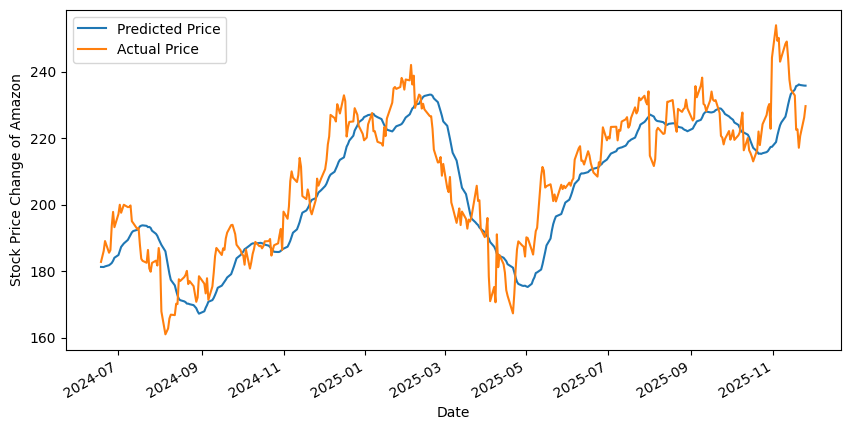

In [29]:
# Comparison for Linear Regression - Actual vs Predicted

predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Stock Price Change of Amazon")
plt.show()

In [30]:
# Computing the accuracy of our model
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 76.20% accuracy.


In [31]:
# Extract alpha and betas values using Python
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = model.intercept_
beta = model.coef_

# Formulate the Linear Regression Model
print(f"Linear Regression Model predicted value = {alpha:.2f} + {beta[0]:.2f}X1")

alpha = 4.7793509054794185
betas = [ 1.27368452 -0.30651735]
Linear Regression Model predicted value = 4.78 + 1.27X1
